In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from unidecode import unidecode

In [114]:
def merge_csv_files(base_name, start_year, end_year, folder_path):
    dataframes = []

    for year in range(start_year, end_year + 1):
        filename = f'{base_name}{year}.csv'
        file_path = os.path.join(folder_path, filename)

        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
        else:
            print(f"Advertencia: El archivo {file_path} no existe y será omitido.")

    if dataframes:
        merged_df = pd.concat(dataframes, ignore_index=True)
    else:
        merged_df = pd.DataFrame()
        print("Advertencia: No se encontraron archivos para fusionar. Se devuelve un DataFrame vacío.")

    return merged_df

In [115]:
def normalizar_columna(df, columna, a_minusculas=True):

    if columna not in df.columns:
        raise ValueError(f"La columna '{columna}' no existe en el DataFrame")
    
 
    df_normalizado = df.copy()
    
    # Aplicar normalización
    df_normalizado[columna] = df_normalizado[columna].astype(str).apply(
        lambda x: unidecode(x)
            .replace('ñ', 'n').replace('Ñ', 'N') 
            .strip()  
    )

    if a_minusculas:
        df_normalizado[columna] = df_normalizado[columna].str.lower()
    
    return df_normalizado

In [116]:
import pandas as pd
from unidecode import unidecode

def filtrar_municipios_jalisco(df, columna_municipio, verbose=True):
    municipios_oficiales_normalizados = {
        unidecode(mun).lower().replace('ñ', 'n'): mun 
        for mun in [
        "Acatic", "Acatlán de Juárez", "Ahualulco de Mercado", "Amacueca", "Amatitán", "Ameca",
        "Arandas", "Atemajac de Brizuela", "Atengo", "Atenguillo", "Atotonilco el Alto",
        "Atoyac", "Autlán de Navarro", "Ayotlán", "Ayutla", "Bolaños", "Cabo Corrientes",
        "Cañadas de Obregón", "Casimiro Castillo", "Chapala", "Chimaltitán", "Chiquilistlán",
        "Cihuatlán", "Cocula", "Colotlán", "Concepción de Buenos Aires", "Cuautitlán de García Barragán",
        "Cuautla", "Cuquío", "Degollado", "Ejutla", "El Arenal", "El Grullo", "El Limón",
        "El Salto", "Encarnación de Díaz", "Etzatlán", "Gómez Farías", "Guachinango", "Guadalajara",
        "Hostotipaquillo", "Huejúcar", "Huejuquilla el Alto", "Ixtlahuacán de los Membrillos",
        "Ixtlahuacán del Río", "Jalostotitlán", "Jamay", "Jesús María", "Jilotlán de los Dolores",
        "Jocotepec", "Juanacatlán", "Juchitlán", "La Barca", "La Huerta", "La Manzanilla de la Paz",
        "Lagos de Moreno", "Magdalena", "Mascota", "Mazamitla", "Mexticacán", "Mezquitic",
        "Mixtlán", "Ocotlán", "Ojuelos de Jalisco", "Pihuamo", "Poncitlán", "Puerto Vallarta",
        "Quitupan", "San Cristóbal de la Barranca", "San Diego de Alejandría", "San Gabriel",
        "San Ignacio Cerro Gordo", "San Juan de los Lagos", "San Juanito de Escobedo",
        "San Julián", "San Marcos", "San Martín de Bolaños", "San Martín Hidalgo",
        "San Miguel el Alto", "San Pedro Tlaquepaque", "San Sebastián del Oeste", "Santa María de los Ángeles",
        "Santa María del Oro", "Sayula", "Tala", "Talpa de Allende", "Tamazula de Gordiano",
        "Tapalpa", "Tecalitlán", "Techaluta de Montenegro", "Tecolotlán", "Tenamaxtlán",
        "Teocaltiche", "Teocuitatlán de Corona", "Tepatitlán de Morelos", "Tequila", "Teuchitlán",
        "Tizapán el Alto", "Tlajomulco de Zúñiga", "Tlaquepaque", "Tolimán", "Tomatlán",
        "Tonalá", "Tonaya", "Tonila", "Totatiche", "Tototlán", "Tuxcacuesco", "Tuxcueca",
        "Tuxpan", "Unión de San Antonio", "Unión de Tula", "Valle de Guadalupe", "Valle de Juárez",
        "Villa Corona", "Villa Guerrero", "Villa Hidalgo", "Villa Purificación", "Yahualica de González Gallo",
        "Zacoalco de Torres", "Zapotiltic", "Zapotitlán de Vadillo", "Zapotlán el Grande", "Zapotlán del Rey",
        "Zapotlanejo"
    ]
    
    }
    
    # Registro de operación
    registros_eliminados = []
    
    # Función de normalización
    def normalizar(texto):
        return unidecode(str(texto)).lower().replace('ñ', 'n').strip()
    
    # Filtrado
    mascara = df[columna_municipio].apply(
        lambda x: normalizar(x) in municipios_oficiales_normalizados
    )
    
    df_filtrado = df[mascara].copy()
    
    # Reemplazar nombres por los oficiales (opcional)
    df_filtrado[columna_municipio] = df_filtrado[columna_municipio].apply(
        lambda x: municipios_oficiales_normalizados[normalizar(x)]
    )
    
    # Reporte
    if verbose:
        n_original = len(df)
        n_filtrado = len(df_filtrado)
        print(
            f"Filtrado completado:\n"
            f"- Registros originales: {n_original}\n"
            f"- Registros conservados: {n_filtrado}\n"
            f"- Registros eliminados: {n_original - n_filtrado}"
        )
    
    return df_filtrado

In [ ]:
def filtrar_municipios_jalisco(df, columna_municipio, verbose=True):
    municipios_oficiales = [
        "Acatic", "Acatlán de Juárez", "Ahualulco de Mercado", "Amacueca", "Amatitán", "Ameca",
        "Arandas", "Atemajac de Brizuela", "Atengo", "Atenguillo", "Atotonilco el Alto",
        "Atoyac", "Autlán de Navarro", "Ayotlán", "Ayutla", "Bolaños", "Cabo Corrientes",
        "Cañadas de Obregón", "Casimiro Castillo", "Chapala", "Chimaltitán", "Chiquilistlán",
        "Cihuatlán", "Cocula", "Colotlán", "Concepción de Buenos Aires", "Cuautitlán de García Barragán",
        "Cuautla", "Cuquío", "Degollado", "Ejutla", "El Arenal", "El Grullo", "El Limón",
        "El Salto", "Encarnación de Díaz", "Etzatlán", "Gómez Farías", "Guachinango", "Guadalajara",
        "Hostotipaquillo", "Huejúcar", "Huejuquilla el Alto", "Ixtlahuacán de los Membrillos",
        "Ixtlahuacán del Río", "Jalostotitlán", "Jamay", "Jesús María", "Jilotlán de los Dolores",
        "Jocotepec", "Juanacatlán", "Juchitlán", "La Barca", "La Huerta", "La Manzanilla de la Paz",
        "Lagos de Moreno", "Magdalena", "Mascota", "Mazamitla", "Mexticacán", "Mezquitic",
        "Mixtlán", "Ocotlán", "Ojuelos de Jalisco", "Pihuamo", "Poncitlán", "Puerto Vallarta",
        "Quitupan", "San Cristóbal de la Barranca", "San Diego de Alejandría", "San Gabriel",
        "San Ignacio Cerro Gordo", "San Juan de los Lagos", "San Juanito de Escobedo",
        "San Julián", "San Marcos", "San Martín de Bolaños", "San Martín Hidalgo",
        "San Miguel el Alto", "San Pedro Tlaquepaque", "San Sebastián del Oeste", "Santa María de los Ángeles",
        "Santa María del Oro", "Sayula", "Tala", "Talpa de Allende", "Tamazula de Gordiano",
        "Tapalpa", "Tecalitlán", "Techaluta de Montenegro", "Tecolotlán", "Tenamaxtlán",
        "Teocaltiche", "Teocuitatlán de Corona", "Tepatitlán de Morelos", "Tequila", "Teuchitlán",
        "Tizapán el Alto", "Tlajomulco de Zúñiga", "Tlaquepaque", "Tolimán", "Tomatlán",
        "Tonalá", "Tonaya", "Tonila", "Totatiche", "Tototlán", "Tuxcacuesco", "Tuxcueca",
        "Tuxpan", "Unión de San Antonio", "Unión de Tula", "Valle de Guadalupe", "Valle de Juárez",
        "Villa Corona", "Villa Guerrero", "Villa Hidalgo", "Villa Purificación", "Yahualica de González Gallo",
        "Zacoalco de Torres", "Zapotiltic", "Zapotitlán de Vadillo", "Zapotlán el Grande", "Zapotlán del Rey",
        "Zapotlanejo"
    ]
    
    # Normalización para comparación
    municipios_normalizados = {
        unidecode(mun).lower().replace('ñ', 'n'): mun 
        for mun in municipios_oficiales
    }
    
    # Preparamos registro de eliminaciones
    reporte = {
        'eliminados': [],
        'conservados': [],
        'total_original': len(df),
        'total_filtrado': 0
    }
    
    def normalizar_nombre(nombre):
        return unidecode(str(nombre)).lower().replace('ñ', 'n')
    
    # Filtrado
    datos_filtrados = []
    for idx, row in df.iterrows():
        original = row[columna_municipio]
        normalizado = normalizar_nombre(original)
        
        if normalizado in municipios_normalizados:
            row[columna_municipio] = municipios_normalizados[normalizado]
            datos_filtrados.append(row)
            reporte['conservados'].append(original)
        else:
            reporte['eliminados'].append({
                'indice': idx,
                'valor_original': original,
                'razon': 'No es municipio de Jalisco' if normalizado else 'Valor nulo/vacío'
            })
    
    df_filtrado = pd.DataFrame(datos_filtrados).reset_index(drop=True)
    reporte['total_filtrado'] = len(df_filtrado)
    
    # Retorno consistente
    if verbose:
        print(f"\n=== REPORTE DE FILTRADO ===")
        print(f"• Filas originales: {reporte['total_original']}")
        print(f"• Filas conservadas: {reporte['total_filtrado']}")
        print(f"• Filas eliminadas: {reporte['total_original'] - reporte['total_filtrado']}")
        
        # Mostrar algunos ejemplos de eliminados si hay
        if reporte['eliminados']:
            print("\nEjemplos de registros eliminados:")
            for ejemplo in reporte['eliminados'][:3]:  # Muestra máximo 3 ejemplos
                print(f"Índice {ejemplo['indice']}: '{ejemplo['valor_original']}' - {ejemplo['razon']}")
        
        return df_filtrado  # Siempre devuelve DataFrame cuando verbose=True
    else:
        return df_filtrado, reporte  # Devuelve tupla (DataFrame, dict) cuando verbose=False

In [127]:
regiones_jalisco = {
    "Norte": [
        "Bolanos",
        "Chimalitan",
        "Colotan",
        "Huejicar",
        "Huejuquila el Alto",
        "Mezquito",
        "San Martin de Bolanos",
        "Totaiche",
        "Vila Guerrero"
    ],
    "Altos Norte": [
        "Encarnacion de Diaz",
        "Lagos de Moreno",
        "Ojuelos de Jalisco",
        "San Diego de Alejandria",
        "San Juan de los Lagos",
        "Teocaltiche",
        "Union de San Antonio",
        "Vila Hidalgo"
    ],
    "Altos Sur": [
        "Acatic",
        "Arandas",
        "Canadas de Obregon",
        "Jalostotitlan",
        "Jesus Maria",
        "Mexticacan",
        "San Ignacio Cerro Gordo",
        "San Julian",
        "San Miguel el Alto",
        "Tepatitlan de Morelos",
        "Valle de Guadalupe",
        "Yahualica de Gonzalez Gallo"
    ],
    "Cienega": [
        "Atotonilco el Alto",
        "Ayotlan",
        "Chapala",
        "Degollado",
        "Jamay",
        "Jocotepec",
        "La Barca",
        "Ocotlan",
        "Poncitlan",
        "Tizapan el Alto",
        "Tototlan",
        "Tuxcueca",
        "Zapotlan del Rey"
    ],
    "Sureste": [
        "Concepcion de Buenos Aires",
        "La Manzanilla de la Paz",
        "Mazamitla",
        "Pihuamo",
        "Quitupan",
        "Santa Maria del Oro",
        "Tamazula de Gordiano",
        "Tecalitlan",
        "Valle de Juarez"
    ],
    "Sur": [
        "Amacueca",
        "Atemajac de Brizuela",
        "Atoyac",
        "Gomez Farias",
        "San Gabriel",
        "Sayula",
        "Tapalpa",
        "Techaluta",
        "Tuxpan",
        "Zacoalco de Torres",
        "Zapotiltic",
        "Zapotlan del Vadillo",
        "Zapotlan el Grande"
    ],
    "Sierra de Amula": [
        "Atengo",
        "Chiquilistlan",
        "El Grullo",
        "El Limon",
        "Juchitlan",
        "Tecolotlan",
        "Tenamaxtlan",
        "Tonaya",
        "Union de Tula"
    ],
    "Costa Sur": [
        "Autlan de Navarro",
        "Casimiro Castillo",
        "Cihuatlan",
        "La Huerta",
        "Villa Purificacion"
    ],
    "Costa Norte": [
        "Cabo Corrientes",
        "Puerto Vallarta",
        "Tomatlan"
    ],
    "Sierra Occidental": [
        "Atenguillo",
        "Ayutla",
        "Guachinango",
        "Mascota",
        "San Sebastian del Oeste",
        "Talpa de Allende"
    ],
    "Valles": [
        "Ahualulco de Mercado",
        "Amatitan",
        "Ameca",
        "Cocula",
        "El Arenal",
        "Etzatlan",
        "Hostotipaquillo",
        "Magdalena",
        "San Juanito de Escobedo",
        "San Marcos",
        "San Martin Hidalgo",
        "Tala",
        "Tequila",
        "Teuchitlan"
    ],
    "Centro": [
        "Cuquio",
        "El Salto",
        "Guadalajara",
        "Ixtlahuacan de los Membrillos",
        "Ixtlahuacan del Rio",
        "San Cristobal de la Barranca",
        "San Pedro Tlaquepaque",
        "Tlajomulco de Zuñiga",
        "Tonala",
        "Villa Corona",
        "Zapopan",
        "Zapotlanejo"
    ]
}

# Función para mostrar todas las regiones y sus municipios
def mostrar_regiones():
    for region, municipios in regiones_jalisco.items():
        print(f"\n{region}:")
        for municipio in municipios:
            print(f"- {municipio}")

if __name__ == "__main__":
    print("Regiones y Municipios de Jalisco")
    print("=" * 30)
    mostrar_regiones()

Regiones y Municipios de Jalisco

Norte:
- Bolanos
- Chimalitan
- Colotan
- Huejicar
- Huejuquila el Alto
- Mezquito
- San Martin de Bolanos
- Totaiche
- Vila Guerrero

Altos Norte:
- Encarnacion de Diaz
- Lagos de Moreno
- Ojuelos de Jalisco
- San Diego de Alejandria
- San Juan de los Lagos
- Teocaltiche
- Union de San Antonio
- Vila Hidalgo

Altos Sur:
- Acatic
- Arandas
- Canadas de Obregon
- Jalostotitlan
- Jesus Maria
- Mexticacan
- San Ignacio Cerro Gordo
- San Julian
- San Miguel el Alto
- Tepatitlan de Morelos
- Valle de Guadalupe
- Yahualica de Gonzalez Gallo

Cienega:
- Atotonilco el Alto
- Ayotlan
- Chapala
- Degollado
- Jamay
- Jocotepec
- La Barca
- Ocotlan
- Poncitlan
- Tizapan el Alto
- Tototlan
- Tuxcueca
- Zapotlan del Rey

Sureste:
- Concepcion de Buenos Aires
- La Manzanilla de la Paz
- Mazamitla
- Pihuamo
- Quitupan
- Santa Maria del Oro
- Tamazula de Gordiano
- Tecalitlan
- Valle de Juarez

Sur:
- Amacueca
- Atemajac de Brizuela
- Atoyac
- Gomez Farias
- San Gabrie

In [119]:

def mapear_region(df, columna_municipio):
    # Crear diccionario de mapeo (sin normalizar)
    mapeo = {}
    for region, municipios in regiones_jalisco.items():
        for municipio in municipios:
            mapeo[municipio] = region
    
    # Mapear directamente sin normalización
    df['Región'] = df[columna_municipio].map(mapeo)
    
    # Manejar valores no encontrados
    df['Región'] = df['Región'].fillna('No encontrado')
    
    # Estadísticas
    total = len(df)
    encontrados = sum(df['Región'] != 'No encontrado')
    print(f"Municipios asignados: {encontrados}/{total}")
    
    return df

In [120]:
folder_path = './data/Cuartos_Hoteles'  

merged_data = merge_csv_files('Cuartos_Hoteles_', 2013, 2020, folder_path)

merged_data

,Unnamed: 0,municipio,total,5 estrellas,4 estrellas,3 estrellas,2 estrellas,1 estrellas,sin categoria,año
0,11,Estado,65677,11769,13227,9866,3771,5987,21057,2013
1,12,I Norte,503,0,83,60,9,140,211,2013
2,13,Bolaños,28,0,0,0,0,8,20,2013
3,14,Chimaltitán,8,0,0,0,0,0,8,2013
4,15,Colotlán,138,0,62,0,0,76,0,2013
...,...,...,...,...,...,...,...,...,...,...
936,120,ZAPOTILTIC,54,0,18,0,0,0,36,2020
937,121,ZAPOTITLAN DE VADILLO,20,0,0,0,0,0,20,2020
938,122,ZAPOTLAN DEL REY,28,13,0,15,0,0,0,2020
939,123,ZAPOTLAN EL GRANDE,537,0,137,239,60,101,0,2020


In [121]:
df_normalizado = normalizar_columna(merged_data, 'municipio')
df_normalizado

,Unnamed: 0,municipio,total,5 estrellas,4 estrellas,3 estrellas,2 estrellas,1 estrellas,sin categoria,año
0,11,estado,65677,11769,13227,9866,3771,5987,21057,2013
1,12,i norte,503,0,83,60,9,140,211,2013
2,13,bolanos,28,0,0,0,0,8,20,2013
3,14,chimaltitan,8,0,0,0,0,0,8,2013
4,15,colotlan,138,0,62,0,0,76,0,2013
...,...,...,...,...,...,...,...,...,...,...
936,120,zapotiltic,54,0,18,0,0,0,36,2020
937,121,zapotitlan de vadillo,20,0,0,0,0,0,20,2020
938,122,zapotlan del rey,28,13,0,15,0,0,0,2020
939,123,zapotlan el grande,537,0,137,239,60,101,0,2020


In [122]:
df_filtrado_cols = filtrar_municipios_jalisco(df_normalizado, 'municipio')


Filtrado completado:
- Registros originales: 941
- Registros conservados: 913
- Registros eliminados: 28


In [123]:
df_filtrado_cols

,Unnamed: 0,municipio,total,5 estrellas,4 estrellas,3 estrellas,2 estrellas,1 estrellas,sin categoria,año
2,13,Bolaños,28,0,0,0,0,8,20,2013
3,14,Chimaltitán,8,0,0,0,0,0,8,2013
4,15,Colotlán,138,0,62,0,0,76,0,2013
5,16,Huejúcar,41,0,0,0,0,41,0,2013
6,17,Huejuquilla el Alto,77,0,0,60,0,0,17,2013
...,...,...,...,...,...,...,...,...,...,...
936,120,Zapotiltic,54,0,18,0,0,0,36,2020
937,121,Zapotitlán de Vadillo,20,0,0,0,0,0,20,2020
938,122,Zapotlán del Rey,28,13,0,15,0,0,0,2020
939,123,Zapotlán el Grande,537,0,137,239,60,101,0,2020


In [129]:
df= normalizar_columna(df_filtrado_cols, 'municipio')
df

,Unnamed: 0,municipio,total,5 estrellas,4 estrellas,3 estrellas,2 estrellas,1 estrellas,sin categoria,año
2,13,bolanos,28,0,0,0,0,8,20,2013
3,14,chimaltitan,8,0,0,0,0,0,8,2013
4,15,colotlan,138,0,62,0,0,76,0,2013
5,16,huejucar,41,0,0,0,0,41,0,2013
6,17,huejuquilla el alto,77,0,0,60,0,0,17,2013
...,...,...,...,...,...,...,...,...,...,...
936,120,zapotiltic,54,0,18,0,0,0,36,2020
937,121,zapotitlan de vadillo,20,0,0,0,0,0,20,2020
938,122,zapotlan del rey,28,13,0,15,0,0,0,2020
939,123,zapotlan el grande,537,0,137,239,60,101,0,2020


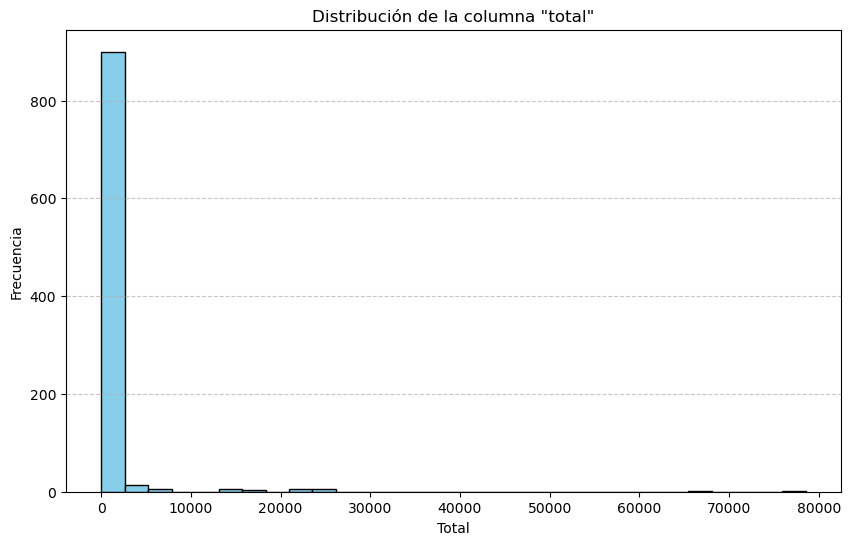

In [125]:
import matplotlib.pyplot as plt

# Asegurarse de que la columna 'total' sea numérica
df_normalizado['total'] = pd.to_numeric(df_normalizado['total'], errors='coerce')

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_normalizado['total'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la columna "total"')
plt.xlabel('Total')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [126]:
df_con_region = mapear_region(df, 'municipio')
df_con_region

Municipios asignados: 450/913


,Unnamed: 0,municipio,total,5 estrellas,4 estrellas,3 estrellas,2 estrellas,1 estrellas,sin categoria,año,Región
0,13,Bolaños,28,0,0,0,0,8,20,2013,No encontrado
1,14,Chimaltitán,8,0,0,0,0,0,8,2013,No encontrado
2,15,Colotlán,138,0,62,0,0,76,0,2013,No encontrado
3,16,Huejúcar,41,0,0,0,0,41,0,2013,No encontrado
4,17,Huejuquilla el Alto,77,0,0,60,0,0,17,2013,No encontrado
...,...,...,...,...,...,...,...,...,...,...,...
908,120,Zapotiltic,54,0,18,0,0,0,36,2020,Sur
909,121,Zapotitlán de Vadillo,20,0,0,0,0,0,20,2020,No encontrado
910,122,Zapotlán del Rey,28,13,0,15,0,0,0,2020,No encontrado
911,123,Zapotlán el Grande,537,0,137,239,60,101,0,2020,No encontrado
